<a href="https://colab.research.google.com/github/RiRa25/Loan-Prediction-System/blob/main/OEA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df = df.dropna()
print(df.isnull().sum())
print("Shape of DataFrame after removing null values:", df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Shape of DataFrame after removing null values: (480, 13)


In [ ]:
df = pd.DataFrame(df)
df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  \
1         128.0             360.0             1.0       

In [ ]:
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].replace({'Urban': 1, 'Rural': 0 , 'Semiurban':1})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [ ]:
column_index_1 = 'Loan_Status'  # Index of the first column
column_index_2 =  'CombinedIncome'
columns_except_interchange = [col for col in df.columns if col not in [column_index_1, column_index_2]]
df = df[columns_except_interchange + [column_index_2, column_index_1]]
print(df)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003    Male        1          1          1              0   
2    LP001005    Male        1          0          1              1   
3    LP001006    Male        1          0          0              0   
4    LP001008    Male        0          0          1              0   
5    LP001011    Male        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978  Female        0          0          1              0   
610  LP002979    Male        1         3+          1              0   
611  LP002983    Male        1          1          1              0   
612  LP002984    Male        1          2          1              0   
613  LP002990  Female        0          0          1              1   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  \
1         128.0             360.0             1.0              0   
2          

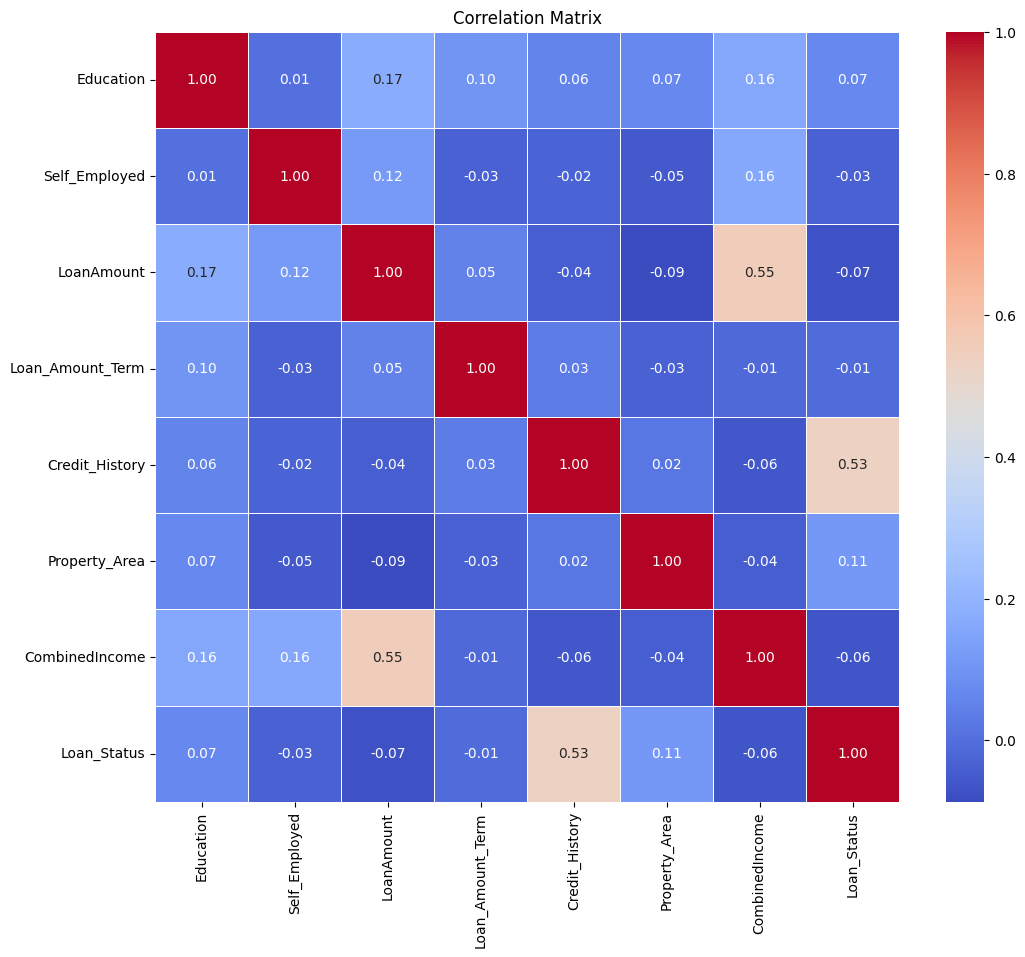

Selected Relevant Features:
['Credit_History', 'Property_Area']
Covariance Matrix:
                  Education  Self_Employed  LoanAmount  Loan_Amount_Term  \
Education          1.000000       0.005085    0.172780          0.102168   
Self_Employed      0.005085       1.000000    0.120389         -0.034852   
LoanAmount         0.172780       0.120389    1.000000          0.050867   
Loan_Amount_Term   0.102168      -0.034852    0.050867          1.000000   
Credit_History     0.056656      -0.023568   -0.040773          0.032937   
Property_Area      0.067607      -0.051851   -0.086569         -0.033777   
CombinedIncome     0.157209       0.161492    0.553914         -0.012822   
Loan_Status        0.068437      -0.034715   -0.071753         -0.007798   

                  Credit_History  Property_Area  CombinedIncome  Loan_Status  
Education               0.056656       0.067607        0.157209     0.068437  
Self_Employed          -0.023568      -0.051851        0.161492    -0.0347

In [ ]:
columns_to_include = [col for col in df.columns if col not in ['Loan_ID','Gender','Dependents','Married']]

subset_df = df[columns_to_include]
corr_matrix = subset_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

correlations = corr_matrix['Loan_Status'].sort_values(ascending=False)
relevant_features = correlations[abs(correlations) > 0.1].index.tolist()
relevant_features.remove('Loan_Status')

# Display selected features
print("Selected Relevant Features:")
print(relevant_features)
print("Covariance Matrix:")
print(corr_matrix)


In [ ]:
df = df.drop(columns=['Loan_ID', 'Gender', 'Dependents', 'Married'])
print(df)

     Education  Self_Employed  LoanAmount  Loan_Amount_Term  Credit_History  \
1            1              0       128.0             360.0             1.0   
2            1              1        66.0             360.0             1.0   
3            0              0       120.0             360.0             1.0   
4            1              0       141.0             360.0             1.0   
5            1              1       267.0             360.0             1.0   
..         ...            ...         ...               ...             ...   
609          1              0        71.0             360.0             1.0   
610          1              0        40.0             180.0             1.0   
611          1              0       253.0             360.0             1.0   
612          1              0       187.0             360.0             1.0   
613          1              1       133.0             360.0             0.0   

     Property_Area  CombinedIncome  Loan_Status  
1

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming df is your DataFrame containing the data
k = 7
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get the scores/ranking of the features
feature_scores = selector.scores_

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

# Sort the selected features and their scores in descending order
sorted_indices = feature_scores.argsort()[::-1]
sorted_selected_features = selected_features_names[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

# Print the selected features along with their scores in descending order
for feature_name, score in zip(sorted_selected_features, sorted_scores):
    print(f"Feature '{feature_name}': Score = {score}")

print("Selected features in descending order:", sorted_selected_features)


Feature 'Credit_History': Score = 186.12272687146904
Feature 'Property_Area': Score = 5.943031878474425
Feature 'LoanAmount': Score = 2.473684413405198
Feature 'Education': Score = 2.249319703449482
Feature 'CombinedIncome': Score = 1.8723948259422387
Feature 'Self_Employed': Score = 0.5767422081715445
Feature 'Loan_Amount_Term': Score = 0.029065422007987052
Selected features in descending order: Index(['Credit_History', 'Property_Area', 'LoanAmount', 'Education',
       'CombinedIncome', 'Self_Employed', 'Loan_Amount_Term'],
      dtype='object')


In [ ]:
feature_names = df.columns.values
print(feature_names)

['Education' 'Self_Employed' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'CombinedIncome' 'Loan_Status']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train a Random Forest regressor
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Feature 'CombinedIncome' (0.330092)
2. Feature 'Credit_History' (0.280332)
3. Feature 'LoanAmount' (0.261975)
4. Feature 'Loan_Amount_Term' (0.049471)
5. Feature 'Self_Employed' (0.029084)
6. Feature 'Property_Area' (0.027383)
7. Feature 'Education' (0.021663)


In [ ]:
df = df.drop(columns=['Education', 'Self_Employed', 'Loan_Amount_Term'])

In [ ]:
print(df)

     LoanAmount  Credit_History  Property_Area  CombinedIncome  Loan_Status
1         128.0             1.0              0          6091.0            0
2          66.0             1.0              1          3000.0            1
3         120.0             1.0              1          4941.0            1
4         141.0             1.0              1          6000.0            1
5         267.0             1.0              1          9613.0            1
..          ...             ...            ...             ...          ...
609        71.0             1.0              0          2900.0            1
610        40.0             1.0              0          4106.0            1
611       253.0             1.0              1          8312.0            1
612       187.0             1.0              1          7583.0            1
613       133.0             0.0              1          4583.0            0

[480 rows x 5 columns]


In [ ]:
sorted_df = df.sort_values(by='LoanAmount', ascending=True)
print(sorted_df)
sorted_df.head()

     LoanAmount  Credit_History  Property_Area  CombinedIncome  Loan_Status
568         9.0             1.0              1          2378.0            0
14         17.0             1.0              1          2385.0            1
94         25.0             1.0              1          3620.0            1
133        25.0             1.0              1          3459.0            1
555        26.0             1.0              1          6500.0            1
..          ...             ...            ...             ...          ...
604       496.0             1.0              1         12000.0            1
487       500.0             1.0              1         18333.0            0
369       570.0             1.0              0         24996.0            0
155       600.0             0.0              1         39999.0            1
561       600.0             1.0              1         19484.0            1

[480 rows x 5 columns]


,LoanAmount,Credit_History,Property_Area,CombinedIncome,Loan_Status
568,9.0,1.0,1,2378.0,0
14,17.0,1.0,1,2385.0,1
94,25.0,1.0,1,3620.0,1
133,25.0,1.0,1,3459.0,1
555,26.0,1.0,1,6500.0,1


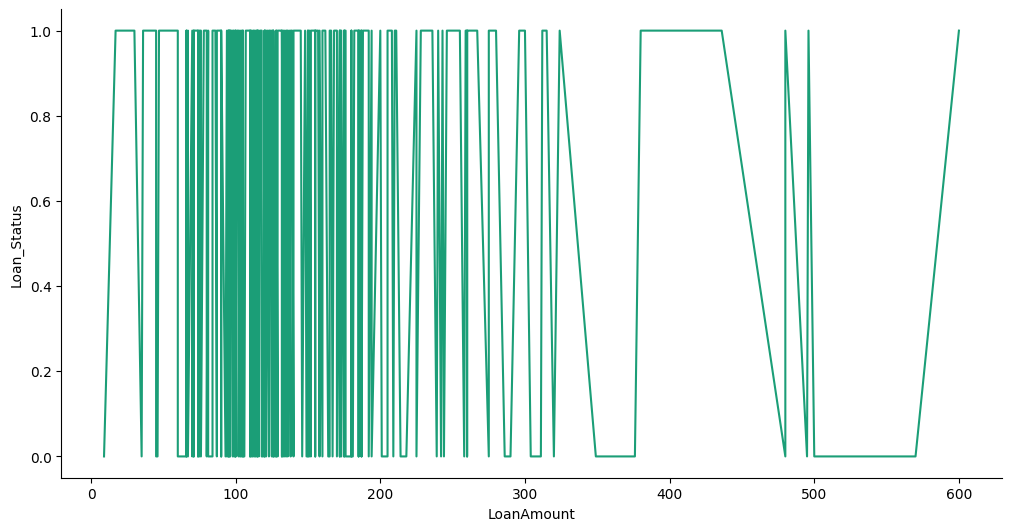

In [ ]:
# @title LoanAmount vs Loan_Status

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['LoanAmount']
  ys = series['Loan_Status']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sorted_df.sort_values('LoanAmount', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LoanAmount')
_ = plt.ylabel('Loan_Status')

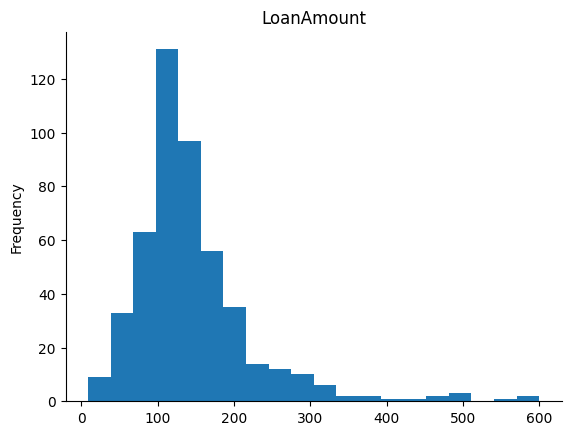

In [ ]:
# @title LoanAmount

from matplotlib import pyplot as plt
sorted_df['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
gp = pd.DataFrame(sorted_df)

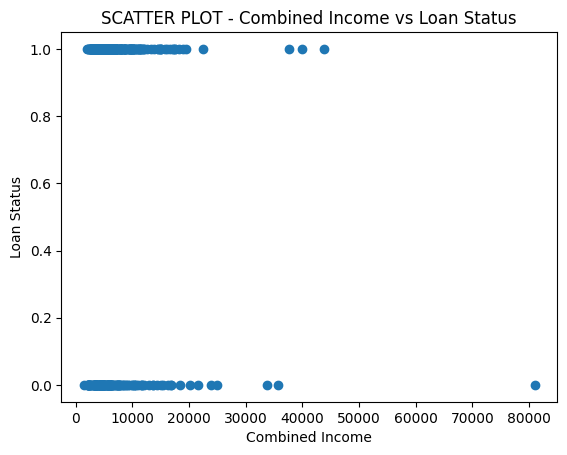

In [ ]:
plt.scatter(gp['CombinedIncome'],gp['Loan_Status'])
plt.title("SCATTER PLOT - Combined Income vs Loan Status")
plt.xlabel('Combined Income')
plt.ylabel('Loan Status')
plt.show()

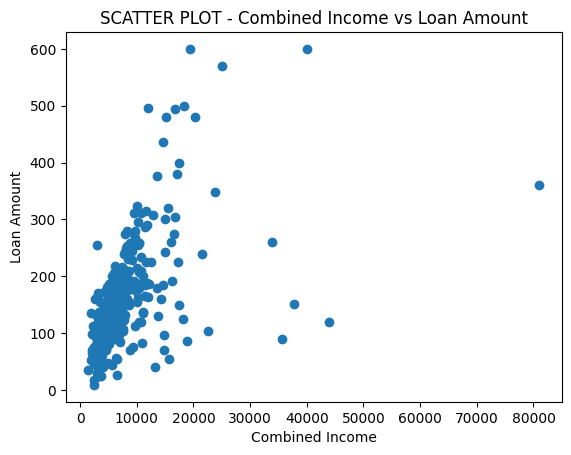

In [ ]:
plt.scatter(gp['CombinedIncome'],gp['LoanAmount'])
plt.title("SCATTER PLOT - Combined Income vs Loan Amount")
plt.xlabel('Combined Income')
plt.ylabel('Loan Amount')
plt.show()

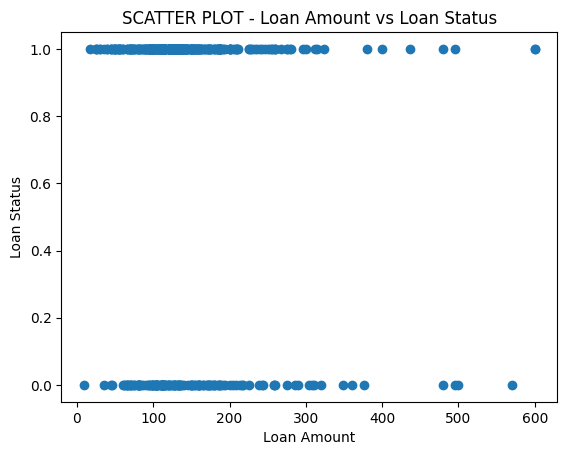

In [ ]:
plt.scatter(gp['LoanAmount'], gp['Loan_Status'])
plt.title("SCATTER PLOT - Loan Amount vs Loan Status")
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()

In [ ]:
df.to_csv('output.csv', index=False)